In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

# IndEng 142: Machine Learning and Data Analytics

## Set-up

In [2]:
# No warnings
import warnings
warnings.filterwarnings('ignore') # Filter out warnings

# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
from sklearn import preprocessing

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression as logit
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB # Gaussian Naive Bayes
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier #stochastic gradient descent
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve as ROC
from sklearn.metrics import roc_auc_score as AUC
from sklearn.model_selection import cross_val_score as CVS
from sklearn.ensemble import VotingClassifier as VC

# Plot styling
sns.set(style='white', context='notebook', palette='deep')
plt.rcParams[ 'figure.figsize' ] = 9 , 5

## Data gathering

In [3]:
main_df = pd.read_csv("train.csv")
songs_df = pd.read_csv("songs.csv")
members_df = pd.read_csv("members.csv")

In [4]:
step1_df = pd.merge(songs_df, main_df, on='song_id')
df = pd.merge(members_df, step1_df, on='msno')

In [5]:
train, test = train_test_split(df,test_size=0.3)

## Data exploration

##### Useful functions

In [6]:
def missing(df):
    missing = list()
    for col in df.columns:
        missing.append(sum(pd.isnull(df[col])))
    missing_perc = [100*x / len(df) for x in missing]
    missing_dict = dict()
    i=0
    for col in df.columns:
        missing_dict[col] = missing_perc[i]
        i=i+1
    missing_dict["Stalion"] = 100
    mis_df = pd.DataFrame([missing_dict]).T
    mis_df.plot.bar()
    return(mis_df)

def explore_distribution(df):
    colormap = plt.cm.viridis
    
    for col in df.drop('target',axis=1).columns:
        print('---------------------------------------------------------')
        ct = pd.crosstab(df[col],df["target"],margins=True).apply(lambda x: 100*x/float(x[-1]),axis=1)
        print(ct)
        ct.plot.bar(colormap=colormap)

##### Set up

In [7]:
train10_df = train.sample(frac=0.12)
main10_df = main_df.sample(frac=0.12)
songs10_df = songs_df.sample(frac=0.12)
members10_df = members_df.sample(frac=0.12)

In [8]:
train10_df.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date,song_id,song_length,genre_ids,artist_name,composer,lyricist,language,source_system_tab,source_screen_name,source_type,target
5160115,0MpYwSr0hICdz8nGRQtCerS7oaU4bb6KlkaQOC+PQMA=,5,19,male,7,20140510,20170920,skCaG6fywLmpJaTNeqL89sis3vUydYzd+HLnBy9DsiE=,199645,1609|2107,David Guetta,David Guetta| Giorgio H. Tuinfort,NaN,-1.0,my library,Local playlist more,local-playlist,0
2138293,M1VEyp1AAKEfq1jaFT7QFgv/vdYhWh2fbXKwVksuUrk=,1,0,NaN,4,20160127,20170611,skrrk46A5o7WyOsWUTLTy5bnznOGeJv2/MFgaS8+VUk=,265404,458,方大同 (Khalil Fong),方大同,方大同,3.0,discover,Online playlist more,online-playlist,0
881191,tQcy3cMSHEoGtGLZnMiKOmb+KpqHOWm2PILbfbhZ37U=,13,0,NaN,3,20130113,20171023,GV6/GvqDHkskJJCKZ4c7KJ2I8D8+vOEWCTi1Bu76U+A=,133248,947,証聲音樂圖書館 ECHO MUSIC,D. Graham,NaN,52.0,my library,Local playlist more,local-playlist,1
2911884,NLlJh4mEaXi+XD2W6mRMkXgH1Z7UtU9RQt07YRojgnk=,5,26,male,3,20121009,20170705,QmZ2VKtW9jXdffR1+3YDLkUWf3JmwDu2qHWu1FFwfbU=,260597,465,五月天 (Mayday),阿信,阿信,3.0,discover,Discover Feature,online-playlist,0
588382,498k/z9q8YCdWEV9pX68wTDqpqNaP9Ev3f+ueim1riA=,1,0,NaN,4,20161223,20170612,5T8a8RaGBM3qxqAGhGAig/gTsw3K6ThicB/hHts6JK8=,293825,786|958,醉愛古典系列,NaN,NaN,-1.0,explore,Search,song,0


In [9]:
songs10_df.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
1054391,treKxiQNdx3F/mcETgMYteifGXlFEN9bjgeNhYRMLvI=,309011,1616,Atilla Cetin| DJ Jean,Atilla Cetin,NaN,-1.0
36402,upM5CKizoILTyLyvEnY/qgtpHc/aT5b987Qb1VyeQ9k=,244645,139,Michael Williams,William Adams| Jef Martens| Charlotte Aitchison,NaN,52.0
1956704,VazjVE2fgD1gvTI6S60wROS5KVQR7qyaglKeY0CdFHU=,164231,139,Laura Mvula,Laura Mvula| Troy Miller,Laura Mvula| Troy Miller,52.0
2054218,FBAfYGd+j2yhCalzd09KYK8BufxqfUNwrV1eVNIx2Ys=,124133,958,Martin Jacoby,NaN,NaN,-1.0
1354,cVqUbq1vr2z9JGYP63W+WDwUc1BtIlDS4BlsDlCBWuA=,292014,451,張學友 (Jacky Cheung),Jia-Wen He,NaN,24.0


In [10]:
members10_df.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
4071,u0RIrtOfwv7celD9FULFyk+WAzd1agmviC6h4+TVGqY=,1,0,NaN,7,20161220,20170919
7545,5r6O9a5lofZgpQTCvVPUQCLFJM9FvEuDFB/LT0/x6bU=,13,22,female,4,20151205,20171007
29940,4o3RF9f/8T4P/zzx8sVq73oNFsz784PU0KD17co/xJE=,1,0,NaN,4,20161201,20161204
31027,a6p1OdAbBYCy84jvDnpJctxhSFMq7Cyz2oNJyfpkR5w=,6,21,female,3,20141021,20180401
11804,b9xK4cyXrRMaBEBsEYVvzXALGpP1gGXZkyfuWmfYc3s=,1,0,NaN,4,20161222,20161225


### a) Attribute Research

#####  Missing Values

,Stalion,msno,song_id,source_screen_name,source_system_tab,source_type,target
0,100.0,0.0,0.0,5.600425,0.247377,0.288945,0.0


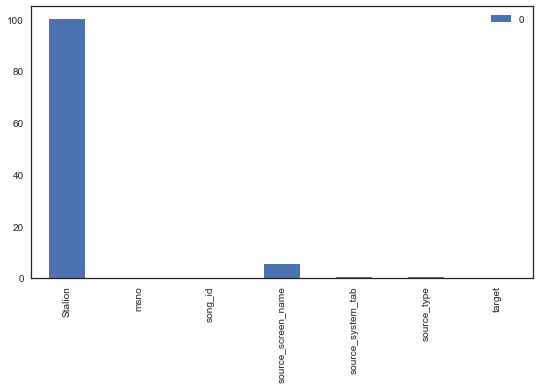

In [11]:
mis_main = missing(main10_df)
mis_main.T.head()

,Stalion,artist_name,composer,genre_ids,language,lyricist,song_id,song_length
0,100.0,0.0,46.780714,4.056859,0.0,84.838401,0.0,0.0


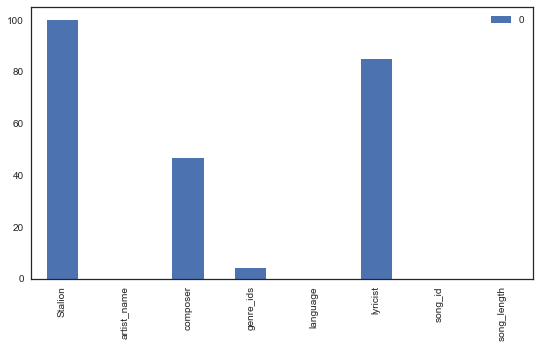

In [12]:
mis_songs = missing(songs10_df)
mis_songs.T.head()

,Stalion,bd,city,expiration_date,gender,msno,registered_via,registration_init_time
0,100.0,0.0,0.0,0.0,57.000969,0.0,0.0,0.0


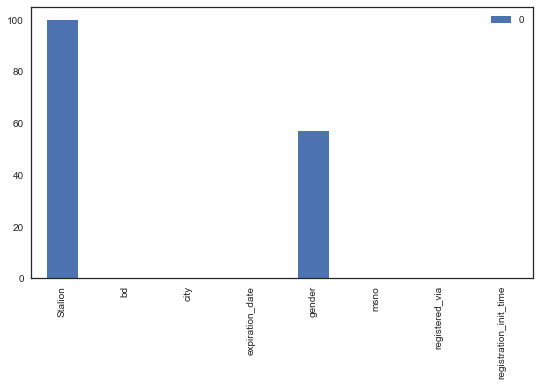

In [13]:
mis_members = missing(members10_df)
mis_members.T.head()

,Stalion,artist_name,bd,city,composer,expiration_date,gender,genre_ids,language,lyricist,msno,registered_via,registration_init_time,song_id,song_length,source_screen_name,source_system_tab,source_type,target
0,100.0,0.0,0.0,0.0,22.759495,0.0,40.154238,1.603213,0.0,43.033889,0.0,0.0,0.0,0.0,0.0,5.667645,0.241733,0.289982,0.0


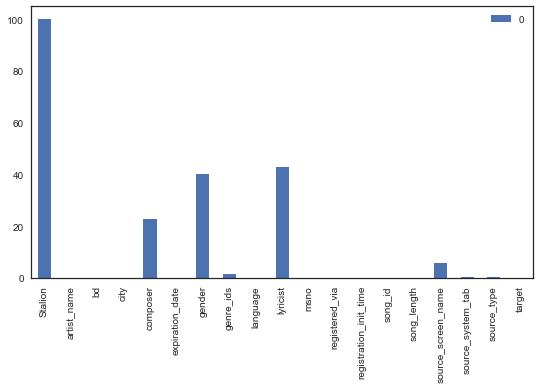

In [14]:
mis_train = missing(train10_df)
mis_train.T.head()

##### Type of Data

In [15]:
train10_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 619693 entries, 5160115 to 89080
Data columns (total 18 columns):
msno                      619693 non-null object
city                      619693 non-null int64
bd                        619693 non-null int64
gender                    370860 non-null object
registered_via            619693 non-null int64
registration_init_time    619693 non-null int64
expiration_date           619693 non-null int64
song_id                   619693 non-null object
song_length               619693 non-null int64
genre_ids                 609758 non-null object
artist_name               619693 non-null object
composer                  478654 non-null object
lyricist                  353015 non-null object
language                  619693 non-null float64
source_system_tab         618195 non-null object
source_screen_name        584571 non-null object
source_type               617896 non-null object
target                    619693 non-null int64
dtypes: 

##### Conclusions

### b) Distributions & Correlations

---------------------------------------------------------
target          0          1    All
city                               
1       50.934582  49.065418  100.0
3       48.763711  51.236289  100.0
4       49.682610  50.317390  100.0
5       48.452006  51.547994  100.0
6       50.113437  49.886563  100.0
7       51.775487  48.224513  100.0
8       49.541536  50.458464  100.0
9       45.716065  54.283935  100.0
10      46.946565  53.053435  100.0
11      52.187500  47.812500  100.0
12      48.821466  51.178534  100.0
13      47.496061  52.503939  100.0
14      48.784942  51.215058  100.0
15      48.945231  51.054769  100.0
16      52.289513  47.710487  100.0
17      47.196017  52.803983  100.0
18      52.072727  47.927273  100.0
19      54.794521  45.205479  100.0
20      41.200000  58.800000  100.0
21      48.964785  51.035215  100.0
22      51.114905  48.885095  100.0
All     49.614729  50.385271  100.0
---------------------------------------------------------
target          0   

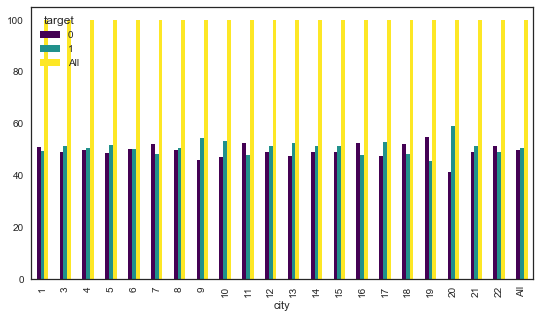

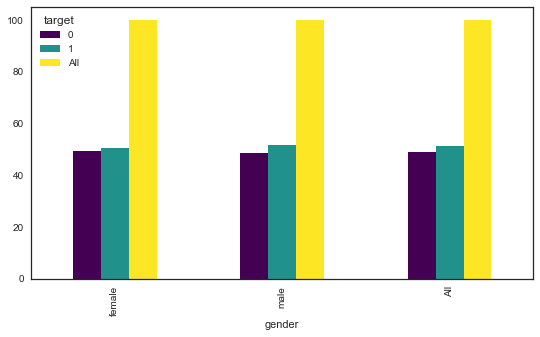

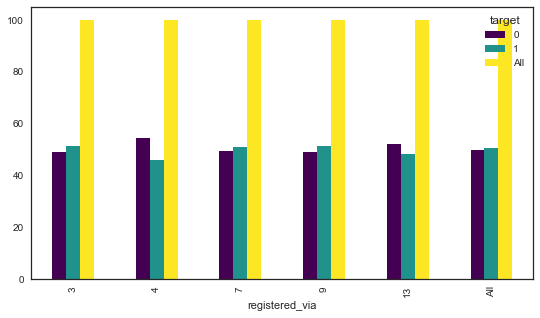

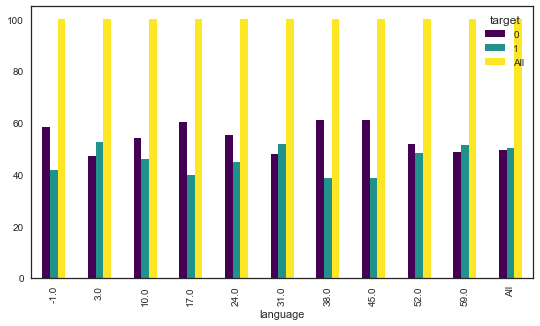

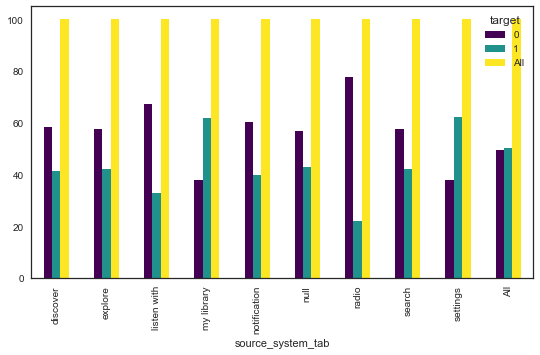

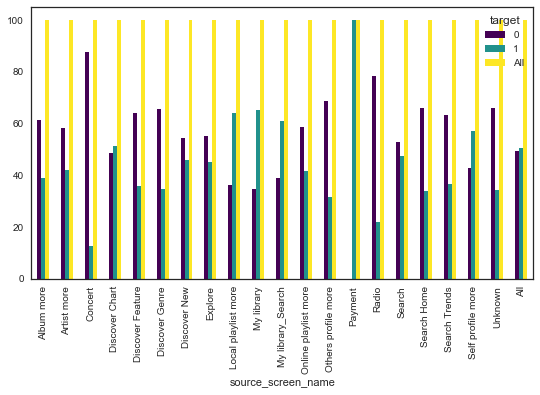

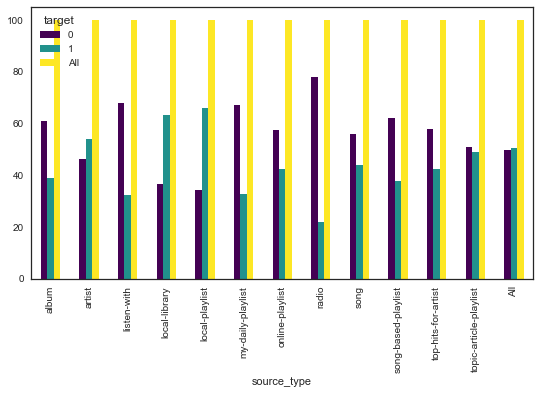

In [16]:
explore_distribution(train10_df.drop(['msno','song_id','registration_init_time','expiration_date','song_length','genre_ids','artist_name','composer','lyricist','bd'],axis=1))

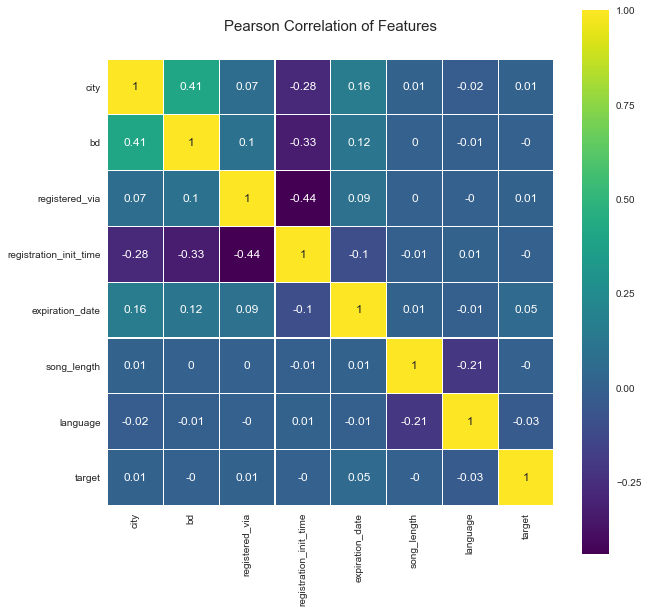

In [17]:
colormap = plt.cm.viridis
plt.figure(figsize=(10,10))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train10_df.select_dtypes(exclude=['object']).astype(float).corr().round(2)\
            ,linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

##### Conclusions

### c) Next Steps

## Data Preparation

### Cleaning

In [18]:
def select_1(df):
    return df.drop(['composer','lyricist','gender','registration_init_time','expiration_date'],axis=1)

In [19]:
def clean_2(df):
    for col in ['genre_ids', 'source_screen_name', 'source_type', 'source_system_tab']:
        df[col].fillna('-1',inplace=True)
    df['language'].fillna(-1,inplace=True)
    return df

### Encoding

In [20]:
def encode_4(df):
    """Function for encoding categorical and non-numerical values into numerical ones"""
    encoder = preprocessing.LabelEncoder()
    for col in df.select_dtypes(include=['object']).columns:
        df[col] = encoder.fit_transform(df[col])
    return df

### Feature Engineering

##### Discretization

In [21]:
def fe_3(df):
    """Function to make buckets and categorize song length. Possible buckets could be: 0-1.5 min | 1.5 to 3 min | 3 to 4.5 min | over 4.5 min"""
    # From https://www.kaggle.com/c/kkbox-music-recommendation-challenge/data we know that song length is expressed in ms
    
    # Step 1: Convert to minutes
    df['song_length_min'] = df['song_length']/(60000)
    
    # Step 2: Make buckets
    df['dis_song_length'] = pd.cut(x=df['song_length_min'],bins=[0,1.5,3,4.5,1000],labels=[0,1,2,3]).astype('int')
    
    # Step 3: Drop old features and return DataFrame  
    return df.drop(['song_length_min','song_length'],axis=1)


### Pipeline

In [22]:
def pipe(df):
    df_1 = select_1(df)
    df_2 = clean_2(df_1)
    df_3 = fe_3(df_2)
    df_4 = encode_4(df_3)
    
    return df_4

### Putting the Training  and Test Sets Through the Pipeline

In [23]:
ptrain10_df = pipe(train10_df)

## Model Short-Listing

### a) Set-Up

In [24]:
nptrain10_df, val10_df = train_test_split(ptrain10_df,test_size=0.15)

X_train = nptrain10_df.drop("target", axis=1).copy()
Y_train = nptrain10_df["target"].copy()

X_val = val10_df.drop("target", axis=1).copy()
Y_val = val10_df["target"].copy()

### b) Model Exploration Function

In [25]:
def modl_exp(name,modl,x_train,y_train,x_val,y_val):
    
    modl.fit(x_train, y_train)
    y_pred = modl.predict(x_val)
    
    train_acc = np.mean(CVS(modl, x_train, y_train))
    conf_mat = confusion_matrix(y_val,y_pred)
    auc_score = AUC(y_val,y_pred)
    fpr, tpr, threshold = ROC(y_val,y_pred)
    
    perf_dic = {'Model': name, '3-fold CV Accuracy': train_acc, 'Confusion Matrix': conf_mat, 'AUC Score': auc_score}
    
    plt.plot(fpr,tpr)
    plt.show()
    print(perf_dic)
    
    return perf_dic

### c) Exploring Models

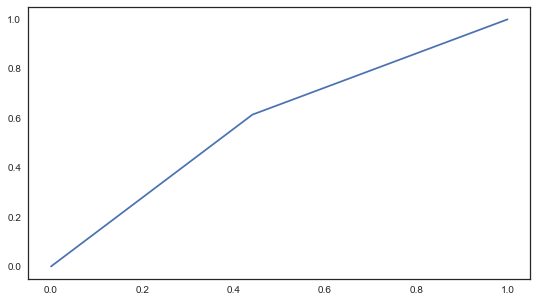

{'Model': 'Logistic', '3-fold CV Accuracy': 0.58928805252893668, 'Confusion Matrix': array([[25737, 20320],
       [18081, 28816]]), 'AUC Score': 0.58663025731084351}


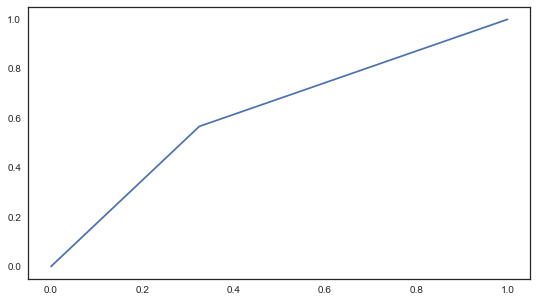

{'Model': 'Random Forest', '3-fold CV Accuracy': 0.61215136844698304, 'Confusion Matrix': array([[31095, 14962],
       [20312, 26585]]), 'AUC Score': 0.62101114148785164}


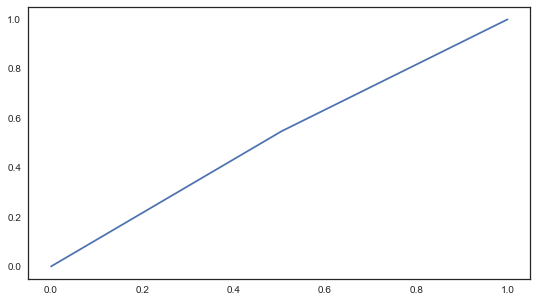

{'Model': 'KNN', '3-fold CV Accuracy': 0.52171568956844872, 'Confusion Matrix': array([[22800, 23257],
       [21234, 25663]]), 'AUC Score': 0.52112963041678462}


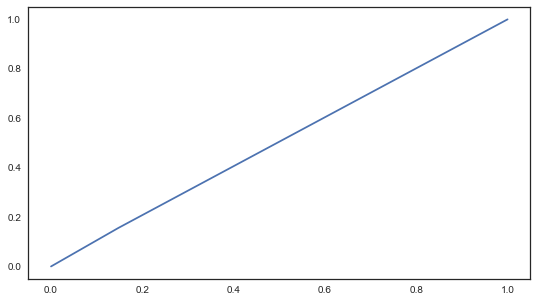

{'Model': 'Perceptron', '3-fold CV Accuracy': 0.49929092983757178, 'Confusion Matrix': array([[39263,  6794],
       [39589,  7308]]), 'AUC Score': 0.50415899944372822}


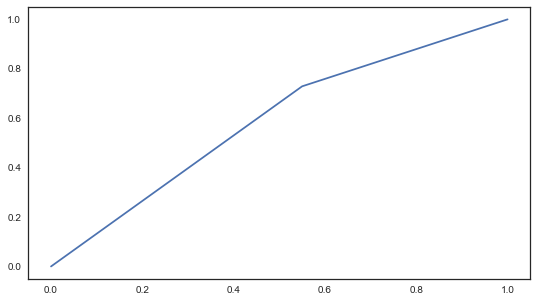

{'Model': 'Gaussian Naive Bayes', '3-fold CV Accuracy': 0.58928995121502259, 'Confusion Matrix': array([[20727, 25330],
       [12711, 34186]]), 'AUC Score': 0.58949425999173144}


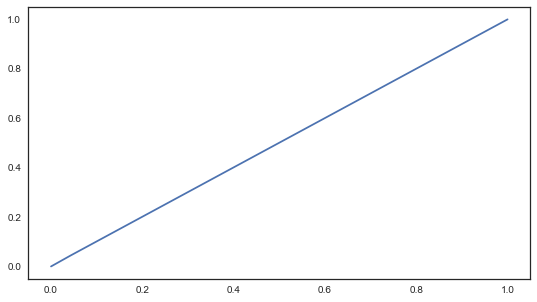

{'Model': 'Stochastic Gradient Descent', '3-fold CV Accuracy': 0.49799046259376128, 'Confusion Matrix': array([[44076,  1981],
       [44813,  2084]]), 'AUC Score': 0.50071294525438503}


In [26]:
models_lst = list()

for modl in [['Logistic',logit()], ['Random Forest',RFC(n_jobs=-1)], ['KNN',KNeighborsClassifier()], ['Perceptron',Perceptron()],['Gaussian Naive Bayes', GaussianNB()],['Stochastic Gradient Descent',SGDClassifier()]]:
    models_lst.append(modl_exp(modl[0], modl[1], X_train, Y_train, X_val, Y_val))


In [27]:
models_df = pd.DataFrame(models_lst)
models_df.set_index('Model',inplace=True)

In [28]:
models_df

,3-fold CV Accuracy,AUC Score,Confusion Matrix
Model,,,
Logistic,0.589288,0.586630,"[[25737, 20320], [18081, 28816]]"
Random Forest,0.612151,0.621011,"[[31095, 14962], [20312, 26585]]"
KNN,0.521716,0.521130,"[[22800, 23257], [21234, 25663]]"
Perceptron,0.499291,0.504159,"[[39263, 6794], [39589, 7308]]"
Gaussian Naive Bayes,0.589290,0.589494,"[[20727, 25330], [12711, 34186]]"
Stochastic Gradient Descent,0.497990,0.500713,"[[44076, 1981], [44813, 2084]]"


### c) Conclusion

## Fine Tuning

### a) Set-Up

In [29]:
train75_df = train.sample(frac=0.75)

ptrain75_df = pipe(train75_df)

X_train75 = ptrain75_df.drop("target", axis=1).copy()
Y_train75 = ptrain75_df["target"].copy()

### b) Random Forest Fine Tuning

##### Tuning: min_samples_leaf

In [59]:
leaf_sizes = [1,10,15,25,50,75,100]
acc_rfc_msl = list()

for samples in leaf_sizes:
    RFC_modl = RFC(n_jobs=-1, min_samples_leaf=samples)
    acc_rfc_msl.append(np.mean(CVS(RFC_modl, X_train75, Y_train75)))    

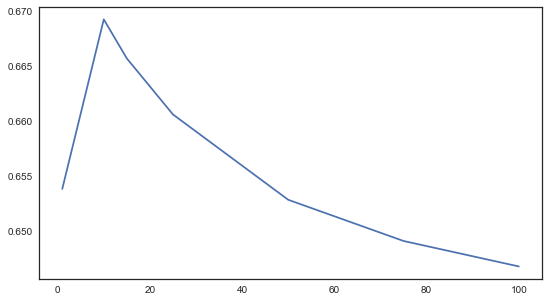

[0.65387840800767549, 0.66930539074288087, 0.66574750250704595, 0.66065182164910452, 0.65288514269249009, 0.64913645043587997, 0.64681917562335334]
Best leaf size: 10


In [60]:
plt.plot(leaf_sizes, acc_rfc_msl)
plt.show()
print(acc_rfc_msl)
best_leaf_size = leaf_sizes[acc_rfc_msl.index(max(acc_rfc_msl))]
print('Best leaf size:',best_leaf_size)

In [63]:
opt_leaf_size = 15

##### Tuning: max_features

In [64]:
features = ['auto','log2','sqrt',0.125,0.25,0.5,0.625,0.75]
acc_rfc_mf = list()

for max_feat in features:
    RFC_modl = RFC(n_jobs=-1, min_samples_leaf=opt_leaf_size, max_features=max_feat)
    acc_rfc_mf.append(np.mean(CVS(RFC_modl, X_train75, Y_train75)))
    print(max_feat)

auto
log2
sqrt
0.125
0.25
0.5
0.625
0.75


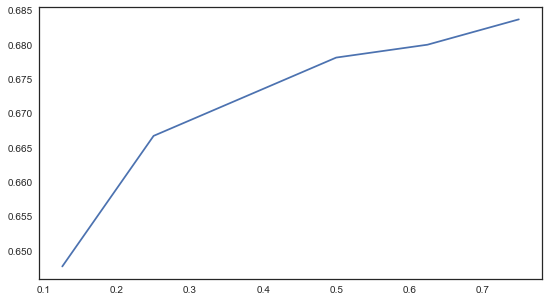

[0.66556857532653568, 0.66488436605041346, 0.66570490079740086, 0.64766294766651067, 0.6666736378555177, 0.67807488812532846, 0.67995039611844199, 0.68363996236590785]
Best max_features: 0.75


In [65]:
plt.plot(features[3:], acc_rfc_mf[3:])
plt.show()
print(acc_rfc_mf)
best_max_feat = features[acc_rfc_mf.index(max(acc_rfc_mf))]
print('Best max_features:',best_max_feat)

In [66]:
opt_max_feat = 0.75

##### Tuning: n_estimators

In [68]:
import time

n_trees = [10,15,20,25]
acc_rfc_ne = list()
speed = list()

i=0
for n_est in n_trees:
    RFC_modl = RFC(n_estimators=n_est,n_jobs=-1, min_samples_leaf=opt_leaf_size, max_features=opt_max_feat)
    
    start = time.time()
    acc_rfc_ne.append(np.mean(CVS(RFC_modl, X_train75, Y_train75)))
    end = time.time()
    
    speed.append(end-start)
    print(speed[i])
    i=i+1

203.3542673587799
246.44982147216797
338.92187547683716
423.785213470459


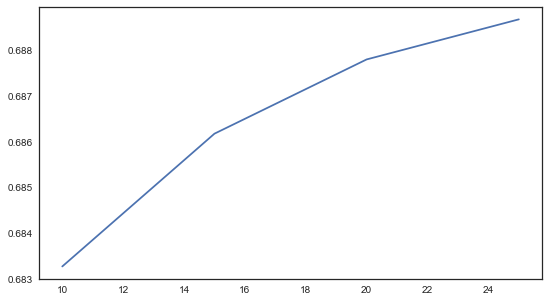

[0.68327100574116129, 0.68618212256692601, 0.68781002425973714, 0.68868865224714992]


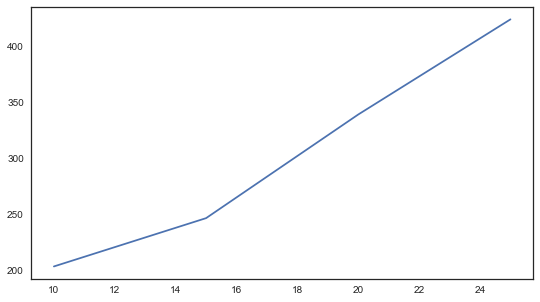

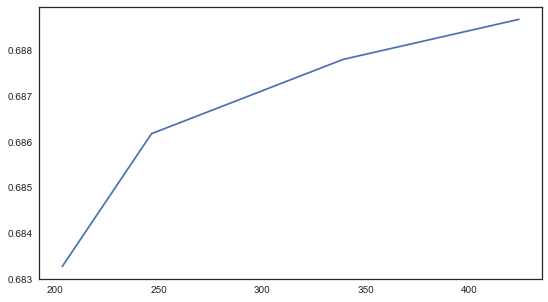

In [69]:
plt.plot(n_trees, acc_rfc_ne)
plt.show()
print(acc_rfc_ne)

plt.plot(n_trees, speed)
plt.show()

plt.plot(speed, acc_rfc_ne)
plt.show()

In [70]:
opt_n_estimators = 25

##### Final RFC Model

In [71]:
final_RFC = RFC(n_estimators=opt_n_estimators,n_jobs=-1, min_samples_leaf=opt_leaf_size, max_features=opt_max_feat, oob_score=True)

### c) Logistic Regression Tuning

In [73]:
cs = [0.01,0.1,1,10]

acc_lr_c = list()

for c in cs:
    logit_modl = logit(C=c)
    acc_lr_c.append(np.mean(CVS(logit_modl, X_train75, Y_train75)))
    print(c)

0.01
0.1
1
10


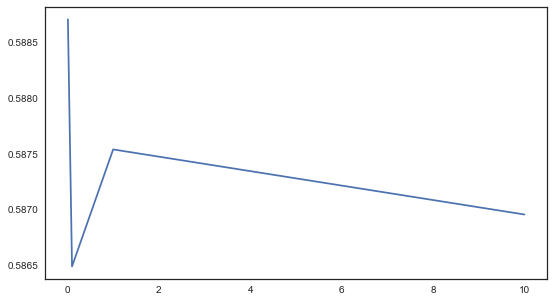

[0.5887078617453172, 0.58648999092196297, 0.5875403167088552, 0.58695628599844463]
Best c: 0.01


In [74]:
plt.plot(cs, acc_lr_c)
plt.show()
print(acc_lr_c)
best_c = cs[acc_lr_c.index(max(acc_lr_c))]
print('Best c:',best_c)

In [80]:
final_logit = logit(C=0.01,n_jobs=-1)

In [81]:
final_gnb = GaussianNB()

### d) Ensemble

In [84]:
models = [('RFC',final_RFC),('Logit',final_logit),('GNB',final_gnb)]

##### Hard voting

In [85]:
hard_vc = VC(models,voting='hard',n_jobs=-1)

In [86]:
CVS(hard_vc, X_train75, Y_train75)

array([ 0.61882934,  0.6190741 ,  0.61849549])

##### Soft voting

In [87]:
soft_vc = VC(models,voting='soft',n_jobs=-1)

In [89]:
CVS(soft_vc, X_train75, Y_train75)

array([ 0.65825915,  0.65927695,  0.65709187])

## Testing

In [90]:
ptrain_df = pipe(train)
ptest_df = pipe(test)

X_train = ptrain_df.drop("target", axis=1).copy()
Y_train = ptrain_df["target"].copy()

X_test = ptest_df.drop("target", axis=1).copy()
Y_test = ptest_df["target"].copy()

In [92]:
final_RFC.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=0.75, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=15,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=25, n_jobs=-1, oob_score=True, random_state=None,
            verbose=0, warm_start=False)

In [93]:
final_RFC.score(X_test,Y_test)

0.62673143586277191